# ATP Tennis Data - Player Diff Stats


In our feature engineering notebooks, we created a dataset for match where we left categorical columns un-encoded. We will run this dataset through various classification models and see how the models perform. I suspect tree based models (especially ensemble models) will perform the best as our data is non-linear

NOTE: since we are not one hot encoding our categories.. this is probably an invalid test. We are purely just getting a quick baseline since this dataset is small


# Summary of Results

* Our best results came from Gradient Boosting with the results below. 
* Only Logistic Regression and Gradient Boosting performed better than our baseline
*  Decision Tree, KNN, and AdaBoost all did below our baseline

```
Model Score: 0.6843349088453747

ROC/AUC Score: 0.6843094896328699
              precision    recall  f1-score   support

        Loss       0.69      0.68      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810

```




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL
import util.model_util as mu
import logging
import importlib

logging.basicConfig(level=logging.INFO)
%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff"


# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    DESCRIPTION = f"{DESCRIPTION}-test"
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features_test-raw_diff-ohe-history-matchup-stats.csv'
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
else:
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features-raw_diff-ohe-history-matchup-stats.csv'




START_YEAR = 1998
END_YEAR = 2018


column_filters = ["util.model_util.BaseDiffFilter"]

In [2]:
X_train, X_test, y_train, y_test = ModelWrapper.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR, column_filters = column_filters)
print(f'Final columns: {X_test.columns}')

INFO:util.model_util:loading ../datasets/atp_matches_1985-2019_features-raw_diff-ohe-history-matchup-stats.csv
INFO:util.model_util:Shape before filtering: (59239, 5459)
INFO:util.model_util:Adding filter: util.model_util.BaseDiffFilter
INFO:util.model_util:Shape after filtering: (59239, 9)
INFO:util.model_util:Final Features shape: (59239, 9)


Final columns: Index(['draw_size', 'round_label', 'tourney_level_label', 'tourney_month',
       'tourney_year', 'age_diff', 'ht_diff', 'seed_diff', 'rank_diff'],
      dtype='object')


# Run all Models

In [3]:
models = [
    LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
    KNeighborsClassifier(n_jobs = N_JOBS),
    DecisionTreeClassifier(random_state = RSTATE),
    RandomForestClassifier(random_state=RSTATE, verbose=1),
    GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
    AdaBoostClassifier(random_state=RSTATE),
]

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))




Running LogisticRegression
[LibLinear]Model Score: 0.6553004726536125

ROC/AUC Score: 0.6553093258824554
              precision    recall  f1-score   support

        Loss       0.65      0.66      0.66      7381
         Win       0.66      0.65      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4857  2524
Win   2581  4848


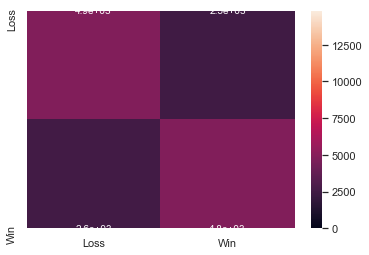

INFO:util.model_util:Saving model file: ../models/logisticregression-1998-2018-diff.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running KNeighborsClassifier
Model Score: 0.6087778528021607

ROC/AUC Score: 0.6087737431945964
              precision    recall  f1-score   support

        Loss       0.61      0.61      0.61      7381
         Win       0.61      0.61      0.61      7429

    accuracy                           0.61     14810
   macro avg       0.61      0.61      0.61     14810
weighted avg       0.61      0.61      0.61     14810

      Loss   Win
Loss  4484  2897
Win   2897  4532


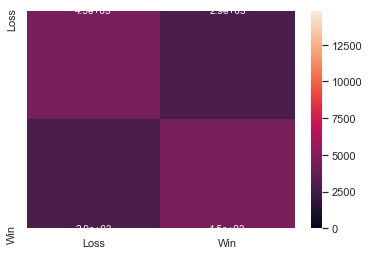

INFO:util.model_util:Saving model file: ../models/kneighborsclassifier-1998-2018-diff.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running DecisionTreeClassifier
Model Score: 0.5653612424037813

ROC/AUC Score: 0.5653612724598083
              precision    recall  f1-score   support

        Loss       0.56      0.57      0.56      7381
         Win       0.57      0.57      0.57      7429

    accuracy                           0.57     14810
   macro avg       0.57      0.57      0.57     14810
weighted avg       0.57      0.57      0.57     14810

      Loss   Win
Loss  4173  3208
Win   3229  4200


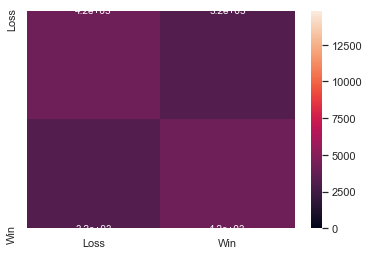

INFO:util.model_util:Saving model file: ../models/decisiontreeclassifier-1998-2018-diff.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running RandomForestClassifier


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Score: 0.6174206617150574

ROC/AUC Score: 0.6176595603169153
              precision    recall  f1-score   support

        Loss       0.60      0.69      0.64      7381
         Win       0.64      0.54      0.59      7429

    accuracy                           0.62     14810
   macro avg       0.62      0.62      0.62     14810
weighted avg       0.62      0.62      0.62     14810

      Loss   Win
Loss  5103  2278
Win   3388  4041


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


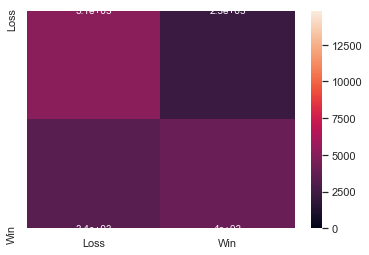

INFO:util.model_util:Saving model file: ../models/randomforestclassifier-1998-2018-diff.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running GradientBoostingClassifier
      Iter       Train Loss   Remaining Time 
         1           1.3644            1.79s
         2           1.3467            1.97s
         3           1.3321            1.87s
         4           1.3201            1.89s
         5           1.3102            1.84s
         6           1.3019            1.80s
         7           1.2951            1.76s
         8           1.2894            1.73s
         9           1.2846            1.71s
        10           1.2805            1.67s
        20           1.2610            1.41s
        30           1.2536            1.21s
        40           1.2489            0.99s
        50           1.2461            0.80s
        60           1.2443            0.62s
Model Score: 0.6593517893315327

ROC/AUC Score: 0.6593606851175821
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66      7381
         Win       0.66     

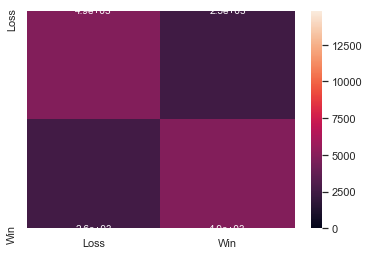

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-diff.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running AdaBoostClassifier
Model Score: 0.6581363943281566

ROC/AUC Score: 0.6581881708735847
              precision    recall  f1-score   support

        Loss       0.65      0.67      0.66      7381
         Win       0.66      0.64      0.65      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4976  2405
Win   2658  4771


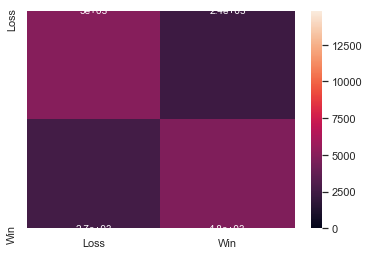

INFO:util.model_util:Saving model file: ../models/adaboostclassifier-1998-2018-diff.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


In [4]:
for model in models:
    print(f'\n\nRunning {type(model).__name__}')
    mw = mu.ModelWrapper(model,
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                    column_filters = column_filters)
    mw.fit(X_train, y_train)
    predict = mw.predict(X_test)
    mw.analyze(y_test)
    plt.show()
    mw.save()

# Summary

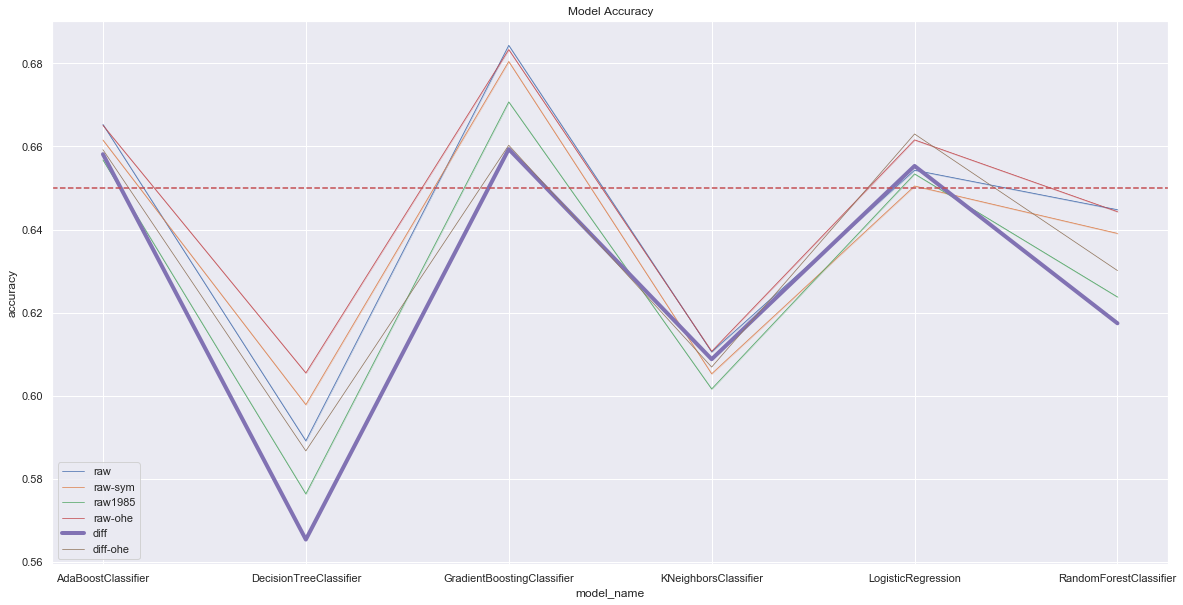

In [5]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)

f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


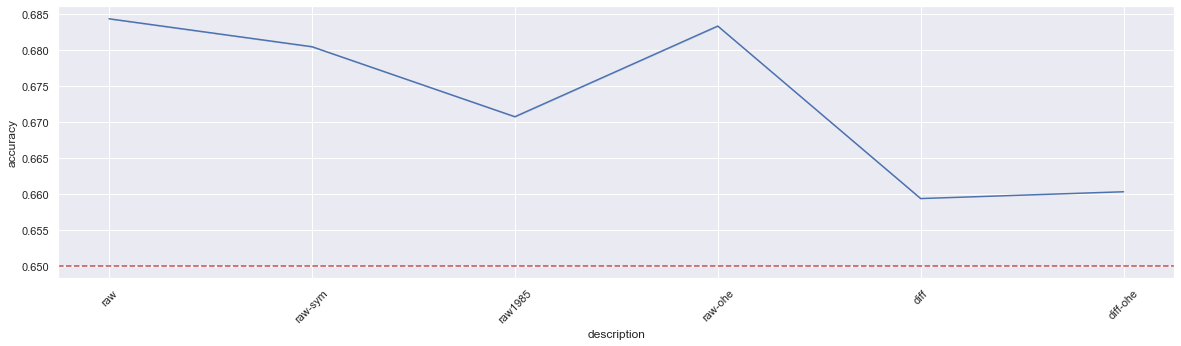

In [6]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == 'GradientBoostingClassifier')]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [7]:
print(f'Last Finished: {datetime.now().strftime(DATE_FORMAT)}')

Last Finished: 2019-10-28 14:10
